In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
heart_data=pd.read_csv("/content/gdrive/MyDrive/heart 123.csv")
heart_data.head(15)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#logistic regression

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
leb=LabelEncoder()

In [16]:
heart_data.ChestPainType=leb.fit_transform(heart_data.ChestPainType)
heart_data.RestingECG = leb.fit_transform(heart_data.RestingECG)
heart_data.ExerciseAngina = leb.fit_transform(heart_data.ExerciseAngina)
heart_data.ST_Slope = leb.fit_transform(heart_data.ST_Slope)
heart_data.Sex=leb.fit_transform(heart_data.Sex)
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [19]:
heart_data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

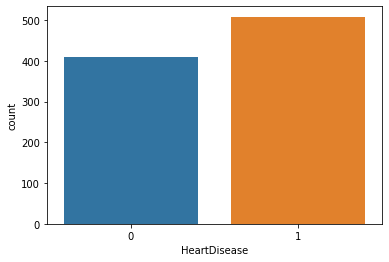

In [20]:
sns.countplot(x="HeartDisease", data=heart_data)

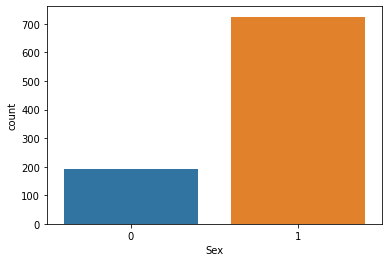

In [21]:
sns.countplot(x="Sex",data=heart_data)
plt.show()

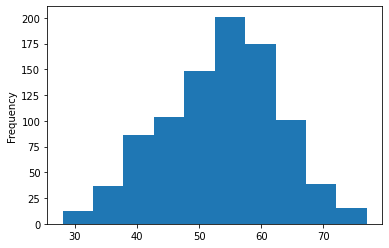

In [22]:
heart_data["Age"].plot.hist()

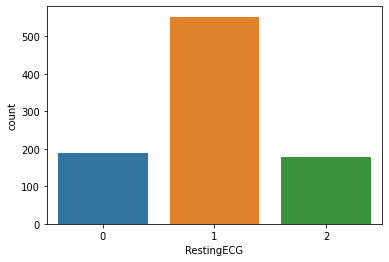

In [23]:
sns.countplot(x="RestingECG", data=heart_data)
plt.show()

In [24]:
heart_data.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

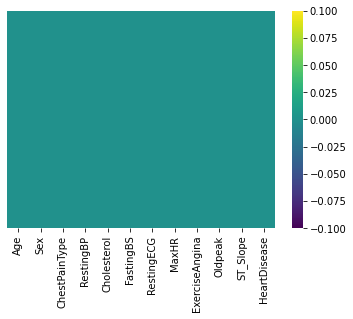

In [26]:
sns.heatmap(heart_data.isnull(), yticklabels=False,cmap="viridis")

In [27]:
y = heart_data.HeartDisease.values
X = heart_data.drop(['HeartDisease'], axis = 1)
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


from sklearn.datasets import load_iris
from sklearn import preprocessing

iris = load_iris()
print(iris.data.shape)

X = iris.data
y = iris.target

normalized_X = preprocessing.normalize(X)

(150, 4)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8369565217391305
Precision Score : 0.8392857142857143
Recall Score : 0.8867924528301887
F1 Score : 0.8623853211009174
Confusion Matrix : 
[[60 18]
 [12 94]]


In [ ]:
#knn

In [30]:
heart_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [31]:
y = heart_data.HeartDisease.values
x = heart_data.drop(['HeartDisease'], axis = 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [33]:
a_score=[]
for k in range(1,18,2):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  a_score.append(accuracy)

mse=[1 - x for x in a_score]

In [34]:
max=a_score[0]
for j in a_score:
  if(j>max):
    max=j
print(max)

0.7355072463768116


In [ ]:
#decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
heart_data.shape

(918, 12)

In [40]:
y = heart_data[['HeartDisease']].copy()
x = heart_data.drop(['HeartDisease'], axis = 1)
x.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [41]:
y.columns

Index(['HeartDisease'], dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [45]:
heart_classifier=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
heart_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [46]:
y_predicted=heart_classifier.predict(x_test)

In [47]:
accuracy_score(y_test,y_predicted)*100

83.33333333333334

In [48]:
confusion_matrix(y_test,y_predicted)

array([[103,  30],
       [ 16, 127]])

In [ ]:
#random forest classifier

In [49]:
labels=heart_data.pop("HeartDisease")

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(heart_data,labels,test_size=0.3)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred= rf.predict(x_test)

In [54]:
from sklearn.metrics import  roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.8755820799657443